In [5]:
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [44]:
def double_gauss (x, A, B, mu1, sigma1, mu2, sigma2):
    y= A*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + B*np.exp(-(x-mu2)**2/(2.*sigma2**2))
    return y

def CosthetaFnc (x, A):
    y=A*r_in**5/((r_in**2 + x**2)**1.5 + (len**2-((r_out-r_in)/2)**2)**1.5 )**(5/3)
    return y


In [3]:
#Cylin='/mnt/c/Users/Christopher Crawford/Desktop/ShimOnlyFinalDim_v2.txt'
#Cylin='/mnt/c/Users/Christopher Crawford/Desktop/StLineSimOnly.txt'
Cylin='/mnt/c/Users/Christopher Crawford/Desktop/StLineFinal_CosthetaOnlyDim_Final.txt'

In [7]:
pc=pd.read_csv(Cylin,delim_whitespace=True)
T_Cy1 = pd.DataFrame(pc)
T_Cy=T_Cy1.dropna()
T_Cy=T_Cy.reset_index(drop=True)

In [8]:
T_Cy["x"]=T_Cy["x"]
T_Cy["y"]=T_Cy["y"]
T_Cy["z"]=T_Cy["z"]

T_Cy=T_Cy.round(4)
T_Cy.duplicated().any()

False

In [9]:
T_Cy

,x,y,z,Bx,By,Bz
0,5.0,-0.3,-20.0,0.2345,0.0051,0.1544
1,-0.2,-0.2,-20.0,0.3916,0.0004,-0.0033
2,-0.1,-0.2,-20.0,0.3908,0.0004,0.0002
3,0.0,-0.2,-20.0,0.3901,0.0004,0.0038
4,0.1,-0.2,-20.0,0.3894,0.0004,0.0073
...,...,...,...,...,...,...
550934,4.6,5.0,20.0,0.2207,-0.0778,-0.1202
550935,4.7,5.0,20.0,0.2179,-0.0809,-0.1234
550936,4.8,5.0,20.0,0.2136,-0.0824,-0.1250
550937,4.9,5.0,20.0,0.2093,-0.0839,-0.1265


In [17]:
r_in=7
r_out=13
len=9

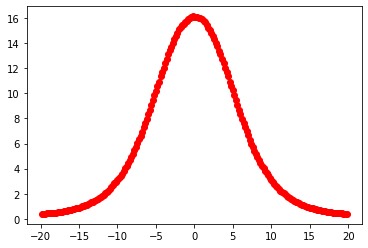

In [16]:
#plot the selected data
df = T_Cy.loc[(abs(T_Cy['x']) == 1.0) & (abs(T_Cy['y']) == 1.0) & (abs(T_Cy['z']) > -20) & (abs(T_Cy['z']) < 20)  ]
#plt.ylim(3,4)
plt.scatter(df["z"],df["Bx"], color='r')

In [45]:
# curve fit
parameters, covariance = curve_fit(CosthetaFnc, df['z'], df['Bx'],[100])

In [46]:
fit_A = parameters[0]
#fit_B = parameters[1]
#fit_C = parameters[2]

print(fit_A)

88.07631467487207


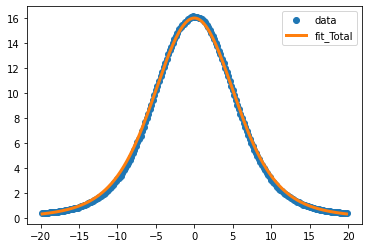

In [48]:
fit_y = CosthetaFnc(df['z'], fit_A)

plt.plot(df['z'], df['Bx'], 'o', label='data')
plt.plot(df['z'], fit_y, '-', label='fit_Total',lw=3)
plt.legend()